### HF reference state for UCC

Defining the molecule

In [1]:
from qiskit_nature.second_q.drivers import PySCFDriver
driver = PySCFDriver(atom="H 0 0 0; li 0 0 1.0", basis="sto-3g")
mol = driver.run()

In [2]:
mol.num_spatial_orbitals

6

In [3]:
mol.num_particles

(2, 2)

In [4]:
mol.orbital_occupations

array([1., 1., 0., 0., 0., 0.])

In [5]:
mol.num_spin_orbitals

12

In [6]:
mol.hamiltonian

## HF reference state

In [7]:
# importing the mapper
from qiskit_nature.second_q.mappers import JordanWignerMapper
mapper = JordanWignerMapper()

In [8]:
from qiskit_nature.second_q.circuit.library import HartreeFock

initial_state=HartreeFock( mol.num_spatial_orbitals, mol.num_particles, mapper)
print(initial_state)

      ┌───┐
 q_0: ┤ X ├
      ├───┤
 q_1: ┤ X ├
      └───┘
 q_2: ─────
           
 q_3: ─────
           
 q_4: ─────
           
 q_5: ─────
      ┌───┐
 q_6: ┤ X ├
      ├───┤
 q_7: ┤ X ├
      └───┘
 q_8: ─────
           
 q_9: ─────
           
q_10: ─────
           
q_11: ─────
           


/usr/local/miniconda3/lib/python3.7/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


### Inbuilt functions

Qiskit

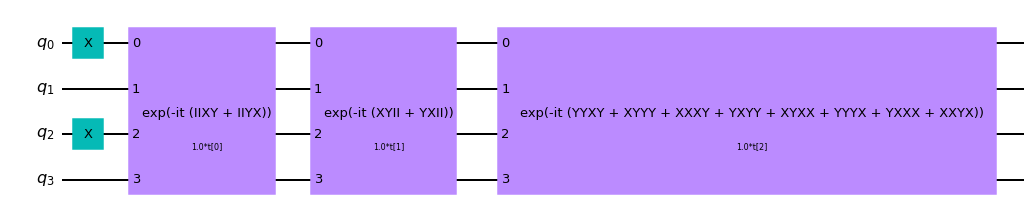

In [9]:
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper



driver = PySCFDriver(atom=f"H 0 0 0; H 0 0 1", spin=0, basis="sto-3g")
mol = driver.run()

mapper = JordanWignerMapper()

ansatz = UCCSD(
    mol.num_spatial_orbitals,
    mol.num_particles,
    mapper,
    initial_state=HartreeFock(
        mol.num_spatial_orbitals,
        mol.num_particles,
        mapper))

ansatz.decompose().draw(output='mpl') # more "decompose()" can be applied to further decompose the blocks into single gates

Tequila

In [10]:
import tequila as tq
import qiskit

In [11]:
geom = "H 0.0 0.0 0.0\nH 0.0 0.0 0.7"
mol = tq.chemistry.Molecule( geometry=geom, basis_set="sto-3g", transformation="jordan_wigner")

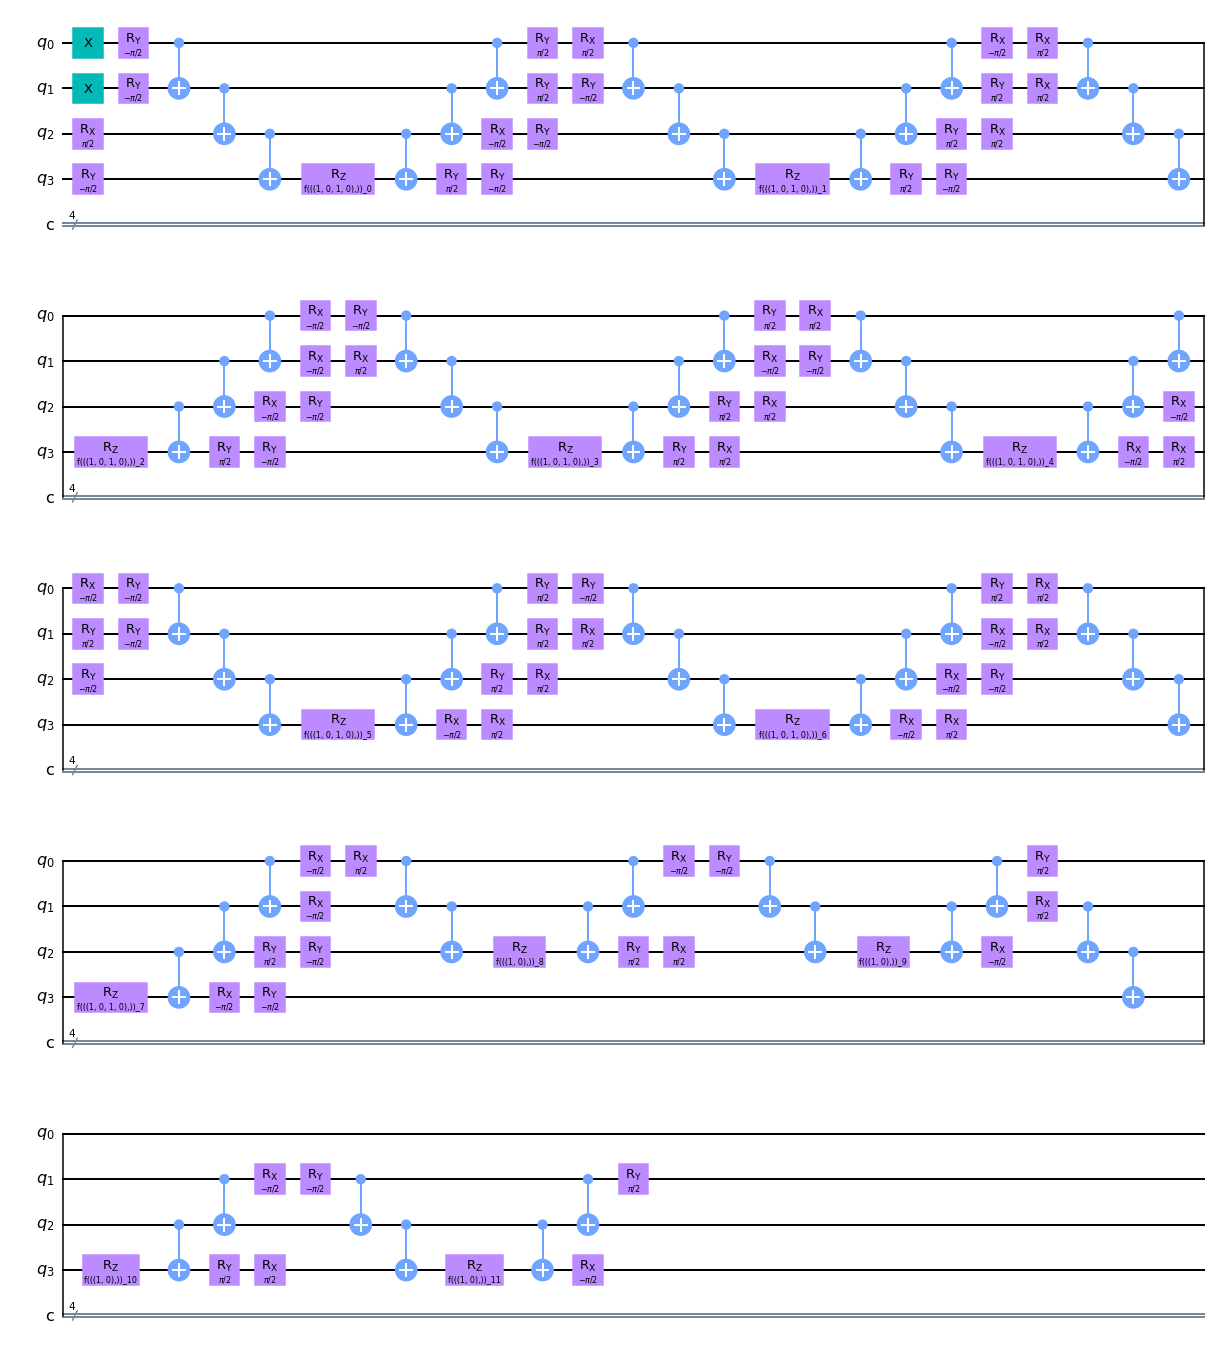

In [12]:
# create the full UCC circuit
ucc_circuit = mol.make_uccsd_ansatz( trotter_steps=1)

qiskit_circuit = tq.compile(ucc_circuit, backend='qiskit').circuit
qiskit_circuit.draw(output='mpl')